In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

In [22]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        class_counts = cf.sum(axis=1)
        print(class_counts)
        group_percentages = []
        for i, value in enumerate(list(cf.flatten())):
            if i < 3:
                group_percentages.append("{0:.2%}".format(value/class_counts[0]))
            elif i >= 3 and i < 6:
                group_percentages.append("{0:.2%}".format(value/class_counts[1]))
            else:
                group_percentages.append("{0:.2%}".format(value/class_counts[2]))
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    plot = sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.savefig("cf_heatmap.png")
    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)



[1.     1.1875 0.9375]


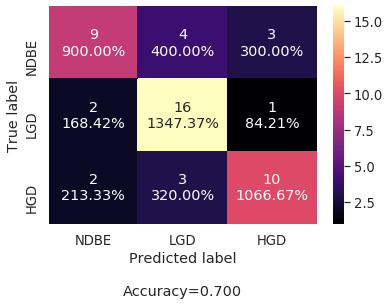

In [23]:
#Get the confusion matrix
labels = np.array([2, 2, 1, 3, 3, 4, 3, 3, 2, 3, 1, 2, 3, 3, 1, 3, 4, 2, 1, 1, 2, 3, 3, 1,
        2, 2, 1, 3, 4, 1, 3, 1, 1, 2, 2, 1, 4, 1, 3, 4, 2, 1, 1, 3, 3, 3, 2, 2,
        3, 1, 2, 2, 3, 3, 1])


predictions_2 = np.array([2, 2, 1, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 1, 2, 3, 1, 1,
        2, 2, 2, 3, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 3, 1, 3, 3, 1, 3, 3, 3, 1, 2,
        3, 1, 3, 2, 1, 1, 1])


cf_labels = np.array([3, 3, 1, 2, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 1, 2, 2, 3, 1, 1, 3, 2, 2, 1,
        3, 3, 1, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 1, 2, 2, 3, 1, 1, 2, 2, 2, 3, 3,
        2, 1, 3, 3, 2, 2, 1])
cf_predictions_2 = np.array([3, 3, 1, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 1, 3, 2, 1, 1,
        3, 3, 3, 2, 2, 1, 2, 1, 2, 2, 3, 3, 2, 3, 2, 1, 2, 2, 1, 2, 2, 2, 1, 3,
        2, 1, 2, 3, 1, 1, 1])



cf_labels_no_IND = np.array([3, 3, 1, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 1, 2, 3, 1, 1, 3, 2, 2, 1,
        3, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1, 1, 2, 3, 1, 1, 2, 2, 2, 3, 3,
        2, 1, 2, 3, 2, 3, 1])

cf_predictions_no_IND_2 = np.array([3, 3, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 2, 1, 3, 2, 1, 1,
        3, 3, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 2, 2, 1, 2, 2, 2, 1, 3,
        2, 1, 2, 3, 1, 1, 1])


cf_matrix = confusion_matrix(cf_labels_no_IND, cf_predictions_no_IND_2)
make_confusion_matrix(cf_matrix, categories=["NDBE", "LGD", "HGD"], cmap="magma")

(50, 3)
0.8511029411764706
0.08525777607999999


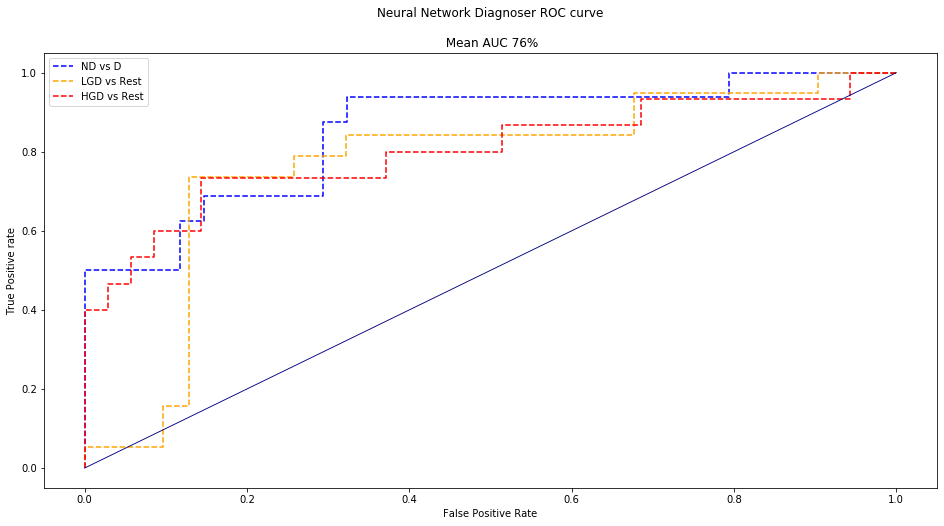

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

invert_label = np.array(labels_no_IND)
#invert_label[np.where(labels==4)] = 3
invert_label[np.where(labels_no_IND==3)] = 2
invert_label[np.where(labels_no_IND==2)] = 3

invert_label_pred = np.array(predictions_2)
invert_label_pred[np.where(predictions_2==4)] = 3
invert_label_pred[np.where(predictions_2==3)] = 2
invert_label_pred[np.where(predictions_2==2)] = 3

y_test = invert_label-1

pred_prob = results[["prob_ndbe", "prob_lgd", "prob_hgd"]]
pred_prob = np.array(pred_prob)
pred_prob = pred_prob[np.where(labels<4)] 
print(pred_prob.shape)
n_class = 3
fpr = {}
tpr = {}
thresh ={}
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting 
from matplotlib.pyplot import figure
figure(figsize=(16,8))
plt.plot(fpr[0], tpr[0], linestyle='--', lw=1.5, color='blue', label='ND vs D')
plt.plot(fpr[1], tpr[1], linestyle='--', lw=1.5, color='orange', label='LGD vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', lw=1.5,color='red', label='HGD vs Rest')
plt.plot([0, 1], [0, 1], color='navy', lw=0.9)
plt.title('Neural Network Diagnoser ROC curve\n\n Mean AUC 76%')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

print(roc_auc_score(invert_label==1, pred_prob[:,0]))
print(thresh[0][np.argmax(tpr[0] - fpr[0])])

In [ ]:
results

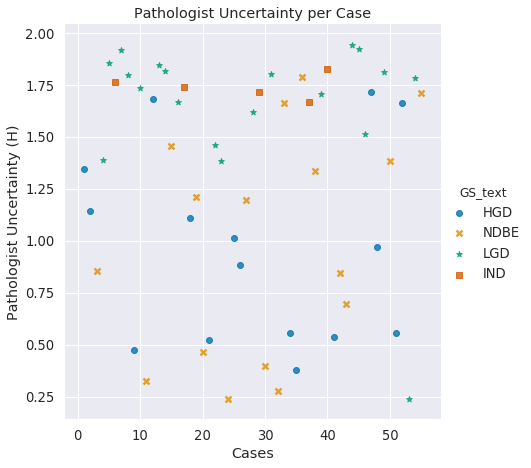

In [17]:
from scipy import stats
from matplotlib import rcParams

# figure size in inches

var1 = "NEP_entropy"
var2 = "mean_var"
sns.set(style="darkgrid")
sns.color_palette("colorblind")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

lmplot = sns.lmplot(x="indices", y=var1, data=results, hue=
                    "GS_text", fit_reg=False, palette=sns.color_palette("colorblind"), markers=["o", "x", "*", "s"],height=6.5)
#lmplot.set(ylim=(-0.001,0.022))
ax = plt.gca()
ax.set_title("Pathologist Uncertainty per Case")
ax.set(xlabel='Cases', ylabel='Pathologist Uncertainty (H)')
lmplot.savefig("PathUncertainty.png")

Text(1.1, 0.19, 'Random-Model')

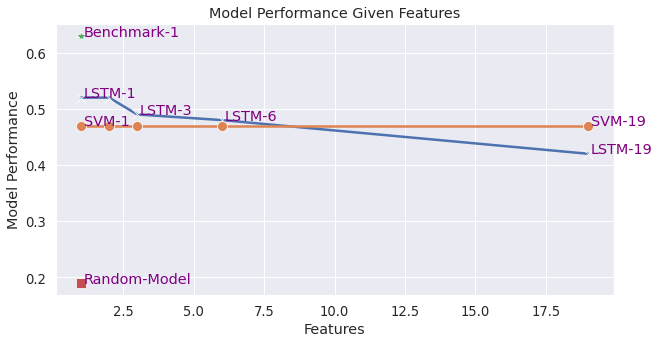

In [73]:
sns.set(style="darkgrid")
sns.color_palette("colorblind")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5, 'lines.markersize':10})

windows = [1,2,3,6,19]
lstm_performance = [0.52,0.52,0.49,0.48,0.42]
svm_performance = [0.47,0.47,0.47, 0.47, 0.47]

benchmark = [0.63]

sns.lineplot( x=windows, y=lstm_performance, marker='x',palette=sns.color_palette("colorblind"))
sns.lineplot( x=windows, y=svm_performance, marker='o',palette=sns.color_palette("colorblind"))
sns.lineplot( x=windows[0], y=benchmark, marker='*',palette=sns.color_palette("colorblind"))
lmplot = sns.lineplot( x=windows[0], y=[0.19], marker='s',palette=sns.color_palette("colorblind"))

#sns.scatterplot(x=windows, y=lstm_performance, marker='*')
#sns.lmplot(x=[1,2,3,5], y=[0.2,0.5,0.6,0.55], fit_reg=False, palette=sns.color_palette("colorblind"), markers=["o", "x", "*", "s"],height=6.5)
ax = plt.gca()
ax.set_title("Model Performance Given Features")
ax.set(xlabel='Features', ylabel='Model Performance')


for i, (x, y) in enumerate(zip(windows, lstm_performance)):
    if i==1:
        continue
    plt.text(x = x+0.1, # x-coordinate position of data label
    y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = "LSTM-{}".format(windows[i]), # data label, formatted to ignore decimals
    color = "purple") # set colour of line
    
for i, (x, y) in enumerate(zip(windows, svm_performance)):
    if i==1 or i==2 or i==3:
        continue
    plt.text(x = x+0.1, # x-coordinate position of data label
    y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = "SVM-{}".format(windows[i]), # data label, formatted to ignore decimals
    color = "purple") # set colour of line

plt.text(x = 1+0.1, # x-coordinate position of data label
y = benchmark[0], # y-coordinate position of data label, adjusted to be 150 below the data point
s = "Benchmark-1", # data label, formatted to ignore decimals
color = "purple") # set colour of line

plt.text(x = 1+0.1, # x-coordinate position of data label
y = 0.19, # y-coordinate position of data label, adjusted to be 150 below the data point
s = "Random-Model", # data label, formatted to ignore decimals
color = "purple") # set colour of line

[Text(0.5, 0, 'Mood'), Text(0, 0.5, 'Frequency')]

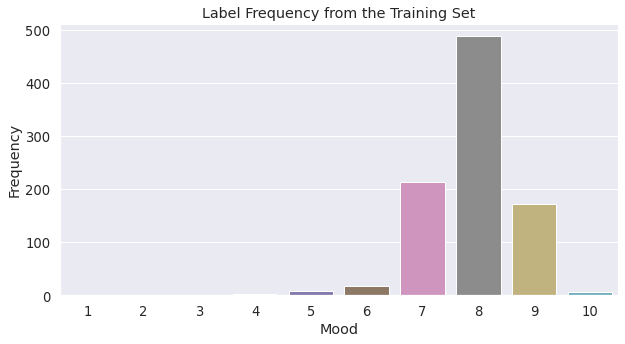

In [59]:
ax = sns.barplot(x=[1,2,3,4,5,6,7,8,9,10],y=[  0,0,0,2,8,18,213,488,173,6])
ax = plt.gca()
ax.set_title("Label Frequency from the Training Set")
ax.set(xlabel='Mood', ylabel='Frequency')